In [1]:
import numpy as np, basic, curvedsky as cs, plottools as pl, healpy as hp, binning as bn, analysis as ana, cmb as CMB, local
from matplotlib.pyplot import *
Tcmb  = 2.726e6    # CMB temperature
ac2rad = np.pi/180./60.

In [2]:
# define parameters
lmax  = 4000       # maximum multipole of output normalization
rlmin, rlmax = 100, lmax  # reconstruction multipole range
sig   = 5.
theta = 1.
L = np.linspace(0,lmax,lmax+1)

In [4]:
ucl = CMB.read_camb_cls('../data_local/cosmo2017_10K_acc3_scalCls.dat',output='array')[:,:lmax+1]
lcl = CMB.read_camb_cls('../data_local/cosmo2017_10K_acc3_lensedCls.dat',ftype='lens',output='array')[:,:lmax+1]
ocl = local.noise(lcl,sig,theta)

In [5]:
Ag = local.rec(rlmax,rlmin,rlmax,lcl,ocl,qdo=['TE','TB','EE','EB','BB'])

In [6]:
labs = [r'$\Theta E$',r'$\Theta B$',r'$EE$',r'$EB$',r'$BB$']
quad = ['TE','TB','EE','EB','BB']
color = ['c','m','g','b','y']

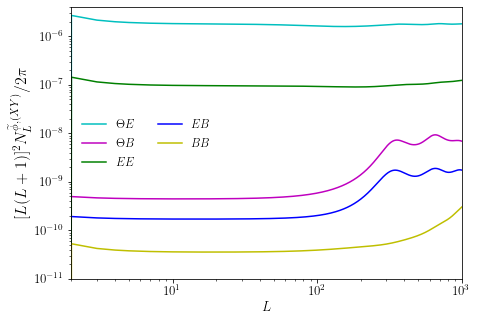

In [9]:
s = (L*(L+1))**2/2/np.pi
#Ag['MV'] = 1./(1./Ag['BB']+1./Ag['EB'])
pl.plot_1dstyle(usetex=True,fsize=[7,5],xmin=2,xmax=1000,ymin=1e-11,ymax=4e-6,xlog=True,ylog=True,ylabsize=16,xticks_labsize=13,\
                yticks_labsize=13,legend_size=12,ylab=r'$[L(L+1)]^2 N^{\widetilde{\phi},(XY)}_L/2\pi$')
for qi, (q,lab,c) in enumerate(zip(quad,labs,color)):
    plot(s*Ag[q],color=c,ls='-',label=lab)
#plot(s*Ag['MV'],color='r',ls='-',label='$BB+EB$')
#plot(s*ucl[3,:]*np.pi/180.,color='k',ls='--',lw=.5)
legend(ncol=2)
savefig('fig_norm.pdf')